# Using pandas pipes

## What are pandas pipes?

Pandas DataFrames provides a rich set of feautres that makes data manituplation and exploration easy.
However, because it is built for general purpose, it can lack common domain-specific operations.
It is tempting to subclass pandas.DataFrame in order to add these as methods but this is generally not recommended.
Instead, pandas provides `pipe` method changing to accomodate these needs. 

## Example: coordinate transformation

In [9]:
%matplotlib inline
import gapipes as gp
r = gp.gaia.query('select top 50 * from gaiadr2.gaia_source')

In [2]:
r.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
0,1635721458409799680,Gaia DR2 5829697511903774080,5829697511903774080,379759382,2015.5,243.123998,0.534166,-61.695001,0.407945,1.188644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
1,1635721458409799680,Gaia DR2 5829701055253868544,5829701055253868544,1168681669,2015.5,242.496014,2.729361,-62.163089,1.877873,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
2,1635721458409799680,Gaia DR2 5829684764449434112,5829684764449434112,1512916310,2015.5,243.123080,0.141668,-61.916076,0.107055,0.071743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
3,1635721458409799680,Gaia DR2 5829695832570865536,5829695832570865536,899863637,2015.5,243.008670,0.304125,-61.720535,0.314474,-0.285236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
4,1635721458409799680,Gaia DR2 5829691503242975616,5829691503242975616,1298707733,2015.5,243.310581,0.197660,-61.824427,0.145823,0.406401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN


In [11]:
r = gp.gaia.query('''
select  top 500 * from gaiadr2.gaia_source
where parallax_over_error>100 and parallax>5''')

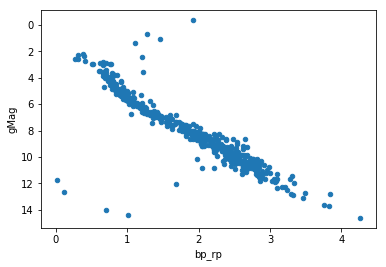

In [13]:
r.pipe(gp.add_gMag).plot.scatter('bp_rp', 'gMag').invert_yaxis();

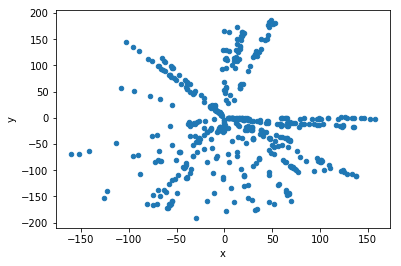

In [14]:
import astropy.coordinates as coord

r.pipe(gp.add_xv, coord.ICRS).plot.scatter('x', 'y',);